In [1]:
#importing libraries
import pandas as pd
import numpy as np
##import dataset
dataset=pd.read_csv("dataset.csv",parse_dates=["created_at"])

##Segregate timestamp to date
dataset['new_date'] = [d.date() for d in dataset['created_at']]
dataset['new_time'] = [d.time() for d in dataset['created_at']]
#dataset.head(2)
group_by_state = dataset.groupby(['user_location']).count()
#grouping data and retaining only one column
df1 = group_by_state[['id']]
#renaming column
df2=df1.rename(columns = {'id':'number of fake tweets'})
df3=df2.reset_index()


In [2]:
#writting file to csv
df3.to_csv("statewise fake tweets2.csv", index=False)

In [4]:
# reading normalised data
normalised_df=pd.read_csv("normalized data.csv")
#sorting in descending order 
df5=normalised_df.sort_index(by=['normalised activity'], ascending=[False])
df6=df5.head(4)
df6

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,State,Poplation,fake news count 2,multiplier,normalised activity,Reporter name,Reporter handle,organisation
8,DC,"681,170",269.0,0.001468062,0.394908678,Glenn Kessler,@GlennKesslerWP,Washington Post
20,MD,"6,016,447",248.0,0.000166211,0.041220328,Pamela Wood,@pwoodreporter,Baltimore Sun
1,AK,"741,894",18.0,0.001347901,0.024262218,Jerzy Shedlock,@jerzyms,Alaska Dispatch News
30,NY,"19,745,289",381.0,5.06E-05,0.0192786,Sydney Ember,@melbournecoal,New York Times


In [5]:
#bar plot for df5
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the common style of a different library called ggplot
matplotlib.style.use("ggplot")

In [6]:
#creating new dataset with top 4 states and normaised twitter rate activity.
newdf = df6.ix[:,['State','normalised activity']]
newdf

,State,normalised activity
8,DC,0.394908678
20,MD,0.041220328
1,AK,0.024262218
30,NY,0.0192786


In [7]:
#setting index
newdf.set_index('State', inplace=True)

In [8]:
newdf=newdf.astype(float)

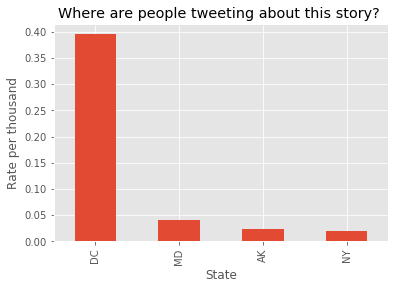

In [9]:
#plotting graph
plot = newdf['normalised activity'].plot.bar(title="Where are people tweeting about this story? ")
fig = plot.get_figure()
plt.ylabel('Rate per thousand')
fig.savefig("state_wise_trend_chart2.png")

In [10]:
# trend charts

In [11]:
#grouping dataset by states
group= dataset.groupby(['user_location','new_date']).count()
group.head()

Type  created_at  favorite_count  geo_enabled  id  \
user_location new_date                                                        
 HI           2017-03-31     0           1               1            1   1   
              2017-04-01     0           2               2            2   2   
 RI           2017-04-01     0           1               1            1   1   
AK            2017-03-27     1           1               1            0   1   
              2017-03-28     2           2               2            0   2   

                          retweet_count  source  text  time_zone  \
user_location new_date                                             
 HI           2017-03-31              1       1     1          1   
              2017-04-01              2       2     2          1   
 RI           2017-04-01              1       1     1          0   
AK            2017-03-27              1       1     1          0   
              2017-03-28              2       2     2          0   

                          user_created_at  user_description  \
user_location new_date                                        
 HI           2017-03-31                1                 1   
              2017-04-01                2                 1   
 RI           2017-04-01                1                 1   
AK            2017-03-27                1                 1   
              2017-03-28                2                 2   

                          user_followers_count  user_friends_count  user_id  \
user_location new_date                                                        
 HI           2017-03-31                     1                   1        1   
              2017-04-01                     2                   2        2   
 RI           2017-04-01                     1                   1        1   
AK            2017-03-27                     1                   1        1   
              2017-03-28                     2                   2        2   

                          user_name  user_screen_name  new_time  
user_location new_date                                           
 HI           2017-03-31          1                 1         1  
              2017-04-01          2                 2         2  
 RI           2017-04-01          1                 1         1  
AK            2017-03-27          1                 1         1  
              2017-03-28          2                 2         2

In [12]:
df11 = group[['id']]

In [13]:
df21=df11.rename(columns = {'id':'number of fake tweets'})
df31=df21.reset_index()
df31['new_date'] = pd.to_datetime(df31['new_date'])
df31.head(3)

,user_location,new_date,number of fake tweets
0,HI,2017-03-31,1
1,HI,2017-04-01,2
2,RI,2017-04-01,1


In [14]:
#Final dataset with 
df8=df6.set_index(np.arange(len(df6.index)))
df8

,State,Poplation,fake news count 2,multiplier,normalised activity,Reporter name,Reporter handle,organisation
0,DC,"681,170",269.0,0.001468062,0.394908678,Glenn Kessler,@GlennKesslerWP,Washington Post
1,MD,"6,016,447",248.0,0.000166211,0.041220328,Pamela Wood,@pwoodreporter,Baltimore Sun
2,AK,"741,894",18.0,0.001347901,0.024262218,Jerzy Shedlock,@jerzyms,Alaska Dispatch News
3,NY,"19,745,289",381.0,5.06E-05,0.0192786,Sydney Ember,@melbournecoal,New York Times


In [15]:
#Variables storing reporter names based on state
reporter1=df8.iloc[0]['Reporter handle']
reporter2=df8.iloc[1]['Reporter handle']
reporter3=df8.iloc[2]['Reporter handle']
reporter4=df8.iloc[3]['Reporter handle']


In [16]:
#variables storing state name
statename1=df8.iloc[0]['State']
statename2=df8.iloc[1]['State']
statename3=df8.iloc[2]['State']
statename4=df8.iloc[3]['State']

In [17]:
statename=df8.iloc[0]['State']
statemultiplier=df8.iloc[0]['multiplier']

In [18]:
trend_df=df31.loc[df31['user_location'] == statename]
df31['number of fake tweets']= pd.to_numeric(df31['number of fake tweets'], errors='coerce').fillna(0)
statemultiplier=pd.to_numeric(statemultiplier)
trend_df['activity rate'] = df31['number of fake tweets']*statemultiplier
trend_df.head(2)

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_location,new_date,number of fake tweets,activity rate
96,DC,2017-03-27,14,0.020553
97,DC,2017-03-28,2,0.002936


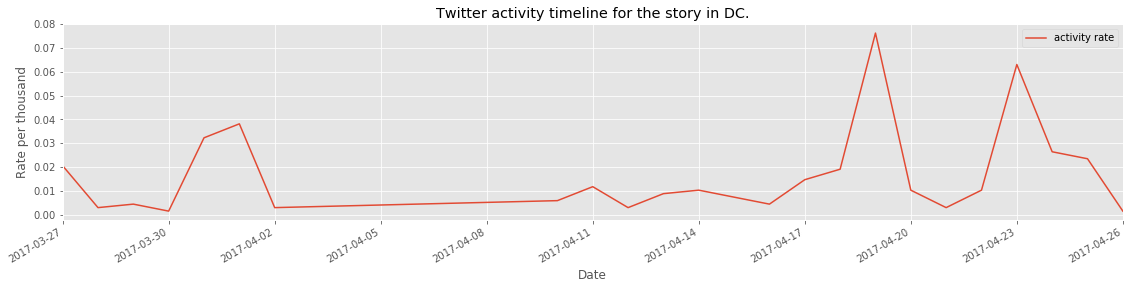

In [19]:
#trend map for 1st state
plot1 = trend_df.plot(x='new_date', y='activity rate',title="Twitter activity timeline for the story in %s."%(statename),figsize=(19,4))
plt.ylabel('Rate per thousand')
plt.xlabel('Date')
fig1 = plot1.get_figure()
fig1.savefig("DCtrend2.png")

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


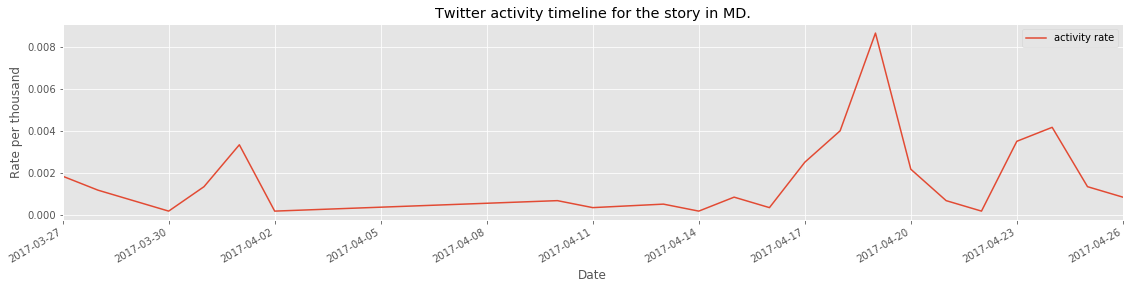

In [20]:
#trend map for 2nd state
statename=df8.iloc[1]['State']
statemultiplier=df8.iloc[1]['multiplier']
trend_df=df31.loc[df31['user_location'] == statename]
df31['number of fake tweets']= pd.to_numeric(df31['number of fake tweets'], errors='coerce').fillna(0)
statemultiplier=pd.to_numeric(statemultiplier)
trend_df['activity rate'] = df31['number of fake tweets']*statemultiplier
#trend_df
#trend_df.plot(x='new_date', y='activity rate',title="Trend of fake news tweets in %s."%(statename),figsize=(19,4))
plot2 = trend_df.plot(x='new_date', y='activity rate',title="Twitter activity timeline for the story in %s."%(statename2),figsize=(19,4))
plt.ylabel('Rate per thousand')
plt.xlabel('Date')
fig2 = plot2.get_figure()
fig2.savefig("MDtrend.png")

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


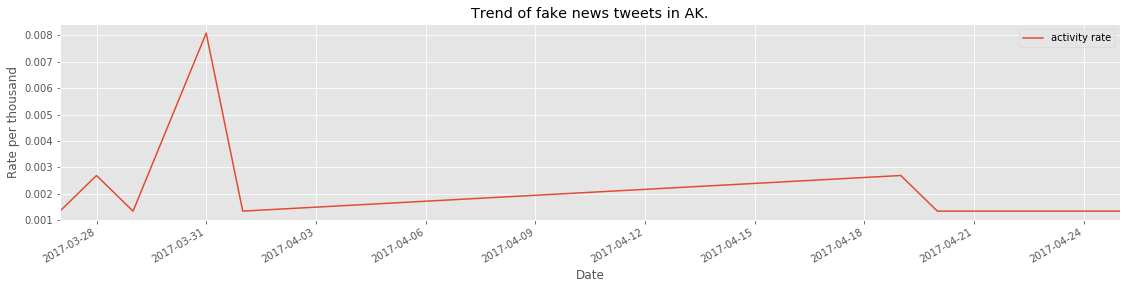

In [21]:
#trend map for 3rd state
statename=df8.iloc[2]['State']
statemultiplier=df8.iloc[2]['multiplier']
trend_df=df31.loc[df31['user_location'] == statename]
df31['number of fake tweets']= pd.to_numeric(df31['number of fake tweets'], errors='coerce').fillna(0)
statemultiplier=pd.to_numeric(statemultiplier)
trend_df['activity rate'] = df31['number of fake tweets']*statemultiplier
trend_df

plot3 = trend_df.plot(x='new_date', y='activity rate',title="Trend of fake news tweets in %s."%(statename3),figsize=(19,4))
plt.ylabel('Rate per thousand')
plt.xlabel('Date')
fig3 = plot3.get_figure()
fig3.savefig("AKtrend.png")

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


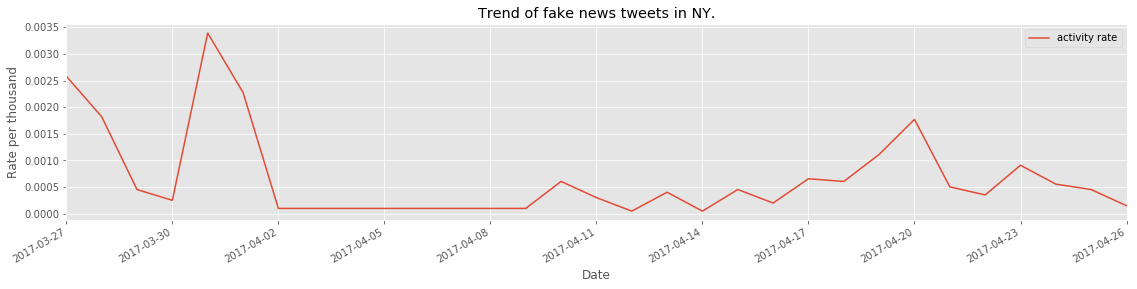

In [22]:
#trend map for 4th state
statename=df8.iloc[3]['State']
statemultiplier=df8.iloc[3]['multiplier']
trend_df=df31.loc[df31['user_location'] == statename]
df31['number of fake tweets']= pd.to_numeric(df31['number of fake tweets'], errors='coerce').fillna(0)
statemultiplier=pd.to_numeric(statemultiplier)
trend_df['activity rate'] = df31['number of fake tweets']*statemultiplier
trend_df

plot4 = trend_df.plot(x='new_date', y='activity rate',title="Trend of fake news tweets in %s."%(statename4),figsize=(19,4))
plt.ylabel('Rate per thousand')
plt.xlabel('Date')
fig4 = plot4.get_figure()
fig4.savefig("NYtrend.png")

In [23]:
# tweeting
import requests
import os
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120
 
#def twitter_api():
consumer_key = 'y1rllLjtj7UfdR0eMwlr5O1li'
consumer_secret = 'Ctv0aHZtML6s6z5bBkKIUjgpDrsk639H1P2w9JR5DFCjdKAOaX'
access_token = '857251563693375489-HNZiMX6DdrgTdKcYKGElVdJFMcIflZQ'
access_secret = '2lszj0BTkXlGcmGT3kAgn8pjYh8e1DgzzzxlwjPqytqYq'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
    #return api
    


In [24]:
#new_tweet = api.update_status("Dc missing girls watch")

In [25]:
title="DC missing girls"

In [26]:
#tweeting media
filename = 'state_wise_trend_chart2.png'
message= "Check out which four states are tweeting the most about %s."%(title)
new_pic =  api.update_with_media(filename,message)

In [27]:
#tweeting to state1
filename2 = 'DCtrend2.png'
#message2= "@%s Trend of DC missing girls in Maryland."%(reporter1)
mssg20="Hey @%s! People in %s are tweeting more than any other state about %s -- a false story!"%(reporter1,statename1,title)
new_pic2 =  api.update_with_media(filename2,mssg20)